In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/GOD_OF_AI/ai-of-god-v20.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/3880.jpg          
  inflating: train/3881.jpg          
  inflating: train/3882.jpg          
  inflating: train/3883.jpg          
  inflating: train/3884.jpg          
  inflating: train/3885.jpg          
  inflating: train/3886.jpg          
  inflating: train/3887.jpg          
  inflating: train/3888.jpg          
  inflating: train/3889.jpg          
  inflating: train/389.jpg           
  inflating: train/3890.jpg          
  inflating: train/3891.jpg          
  inflating: train/3892.jpg          
  inflating: train/3893.jpg          
  inflating: train/3894.jpg          
  inflating: train/3895.jpg          
  inflating: train/3896.jpg          
  inflating: train/3897.jpg          
  inflating: train/3898.jpg          
  inflating: train/3899.jpg          
  inflating: train/39.jpg            
  inflating: train/390.jpg           
  inflating: train/3900.jpg          
  inflating: train/3901.jpg          

### Checking Our Training Data

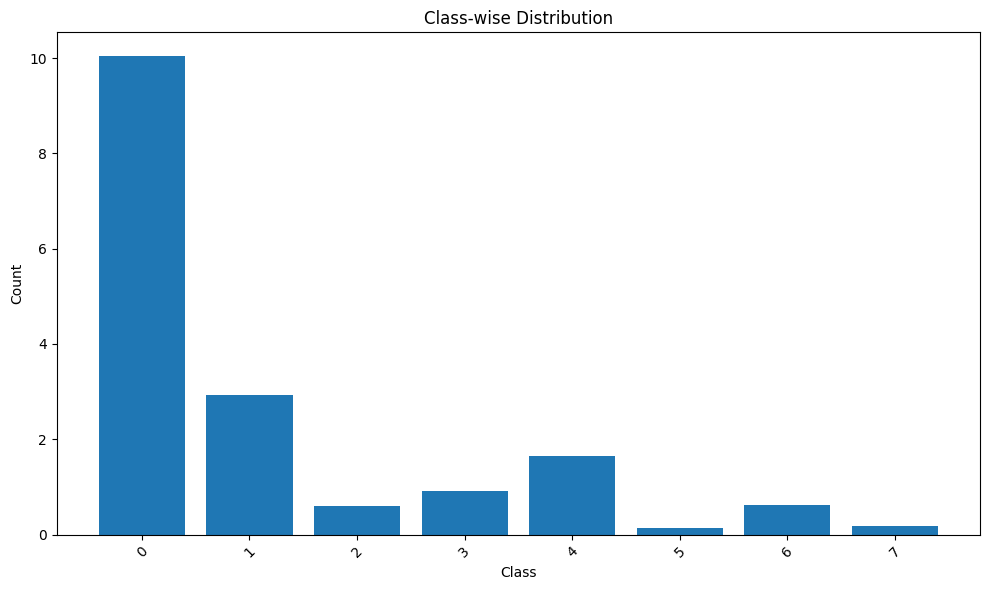

FileName    481.714286
dtype: float64
FileName    327.833333
dtype: float64
       FileName
Class          
0          4829
1          1405
2           285
3           443
4           789
5            68
6           295
7            87


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a pandas DataFrame
csv_file_path = '/content/train.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Step 2: Group the data by the class column and count the occurrences
class_counts = df['Class'].value_counts() / 481

# Step 3: Plot the class-wise distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class-wise Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Step 4: Show the plot or save it to a file
plt.show()
mean_without_0=df[df['Class'] != 0].groupby('Class').count().mean()
mean_without_0_1 = df[(df['Class'] != 0) & (df['Class'] != 1)].groupby('Class').count().mean()
class_counts = df.groupby('Class').count()
print(mean_without_0)
print(mean_without_0_1)
print(class_counts)

### Creating Validation.csv File

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Read the CSV file into a pandas DataFrame
csv_file_path = '/content/train.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Step 2: Split the DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Step 3: Save the training and validation sets to separate CSV files if needed
train_df.to_csv('/content/train_split.csv', index=False)
val_df.to_csv('/content/validation_split.csv', index=False)

# Now, train_df contains your training data, and val_df contains your validation data.



### Creating Sampled Data

In [ ]:
# Import pandas library
import pandas as pd

# Load your csv file as a pandas DataFrame
df = pd.read_csv("/content/train_split.csv")

# Filter out the rows that have class 0
df_0 = df[df['Class'] == 0]
# df_1 = df[df['Class'] == 1]
# Randomly sample 600 rows from the filtered DataFrame
df_0_2500 = df_0.sample(n=2500)
remaining_df_0_2500 = df_0.drop(df_0_2500.index)
remaining_df_0_2500 = remaining_df_0_2500.reset_index(drop=True)
# df_1 = df_1.sample (n=600)
# Concatenate the sampled DataFrame with the original DataFrame without class 0
df = pd.concat ([df[df['Class'] != 0], df_0_2500])
remaining_df = pd.concat ([df[df['Class'] != 0], remaining_df_0_2500])
# df = pd.concat ([df[df['Class'] != 1], df_1])
# Reset the index and drop the old one
df = df.reset_index(drop=True)
remaining_df = remaining_df.reset_index(drop=True)

# Save the new DataFrame as a csv file
df.to_csv ("/content/drive/MyDrive/GOD_OF_AI/new_train_2500.csv", index=False)
# Save the new DataFrame as a csv file
remaining_df.to_csv ("/content/drive/MyDrive/GOD_OF_AI/new_remaining_train_2500.csv", index=False)

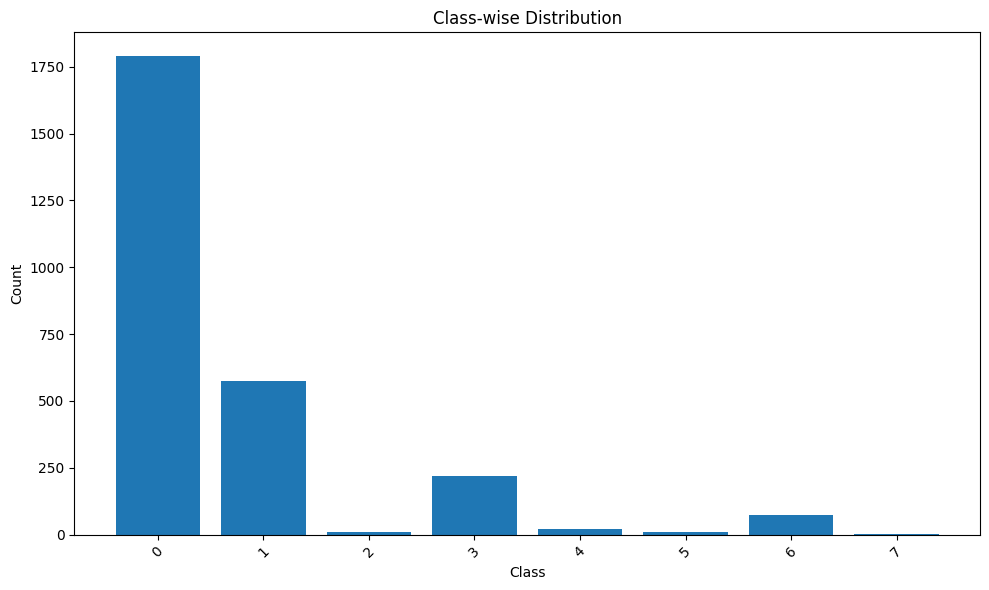

FileName    129.285714
dtype: float64
FileName    55.0
dtype: float64
       FileName
Class          
0          1789
1           575
2             8
3           218
4            20
5            10
6            72
7             2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = '/content/submission.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)
# Step 2: Group the data by the class column and count the occurrences
class_counts = df['Class'].value_counts()

# Step 3: Plot the class-wise distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class-wise Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Step 4: Show the plot or save it to a file
plt.show()
mean_without_0=df[df['Class'] != 0].groupby('Class').count().mean()
mean_without_0_1 = df[(df['Class'] != 0) & (df['Class'] != 1)].groupby('Class').count().mean()
class_counts = df.groupby('Class').count()
print(mean_without_0)
print(mean_without_0_1)
print(class_counts)

### Creating Organized Training Directory

In [ ]:
import pandas as pd
import os
import shutil

# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/drive/MyDrive/GOD_OF_AI/new_train_2500.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Image directory containing your images
image_dir = '/content/train'  # Replace with the path to your image directory

# Create 8 class-specific directories if they don't exist
output_dir_base = '/content/drive/MyDrive/GOD_OF_AI/train_split_directory_2500'
class_labels = df['Class'].unique()
for label in class_labels:
    output_dir = os.path.join(output_dir_base, str(label))
    os.makedirs(output_dir, exist_ok=True)

# Iterate through the DataFrame and move images to the corresponding class-specific directory
for index, row in df.iterrows():
    image_filename = row['FileName']
    class_label = row['Class']
    source_image_path = os.path.join(image_dir, image_filename)
    destination_dir = os.path.join(output_dir_base, str(class_label))
    destination_image_path = os.path.join(destination_dir, image_filename)

    # Move the image to the appropriate directory
    shutil.copy(source_image_path, destination_image_path)

print("Data organization completed.")

Data organization completed.


* Remaining train split data directory

In [ ]:
import pandas as pd
import os
import shutil

# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/drive/MyDrive/GOD_OF_AI/new_remaining_train_2500.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Image directory containing your images
image_dir = '/content/train'  # Replace with the path to your image directory

# Create 8 class-specific directories if they don't exist
output_dir_base = '/content/drive/MyDrive/GOD_OF_AI/remaining_train_split_directory_2500'
class_labels = df['Class'].unique()
for label in class_labels:
    output_dir = os.path.join(output_dir_base, str(label))
    os.makedirs(output_dir, exist_ok=True)

# Iterate through the DataFrame and move images to the corresponding class-specific directory
for index, row in df.iterrows():
    image_filename = row['FileName']
    class_label = row['Class']
    source_image_path = os.path.join(image_dir, image_filename)
    destination_dir = os.path.join(output_dir_base, str(class_label))
    destination_image_path = os.path.join(destination_dir, image_filename)

    # Move the image to the appropriate directory
    shutil.copy(source_image_path, destination_image_path)

print("Data organization completed.")

Data organization completed.


* validation directory

In [ ]:
import pandas as pd
import os
import shutil

# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/validation_split.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Image directory containing your images
image_dir = '/content/train'  # Replace with the path to your image directory

# Create 8 class-specific directories if they don't exist
output_dir_base = '/content/drive/MyDrive/GOD_OF_AI/validation_split_directory'
class_labels = df['Class'].unique()
for label in class_labels:
    output_dir = os.path.join(output_dir_base, str(label))
    os.makedirs(output_dir, exist_ok=True)

# Iterate through the DataFrame and move images to the corresponding class-specific directory
for index, row in df.iterrows():
    image_filename = row['FileName']
    class_label = row['Class']
    source_image_path = os.path.join(image_dir, image_filename)
    destination_dir = os.path.join(output_dir_base, str(class_label))
    destination_image_path = os.path.join(destination_dir, image_filename)

    # Move the image to the appropriate directory
    shutil.copy(source_image_path, destination_image_path)

print("Data organization completed.")

Data organization completed.


### Creating Dummy Images for classes with less data

In [ ]:
import os
import shutil
import random
import pandas as pd
import numpy as np
from torchvision import transforms
from PIL import Image
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
import torchvision.models as models

# Define the paths to your original dataset and train directory
original_dataset_path = '/content/drive/MyDrive/GOD_OF_AI/train_directory_500'
train_directory = '/content/drive/MyDrive/GOD_OF_AI/train_directory_500'

# Define the classes for which you want to create dummy images
target_classes = ['5', '7']  # Replace with your specific class names

# Set the number of dummy images to generate per class
num_dummy_images_per_class = 100

# Ensure the train directory exists
if not os.path.exists(train_directory):
    os.makedirs(train_directory)

def get_randaugment_transform(rotatRand, cont, sat, hu, n, m):
    # Define the base transformations without RandAugment
    base_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(rotatRand),
        transforms.ColorJitter(brightness=0.2, contrast=cont, saturation=sat, hue=hu),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Apply RandAugment on top of the base transformations
    randaug_transform = transforms.Compose([
        transforms.RandAugment(n, m),
        base_transform,
    ])

    return randaug_transform

def get_randaugment_bw_transform(rotatRand, n, m):
    # Define the base transformations without RandAugment
    base_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(rotatRand),
        transforms.Grayscale(num_output_channels=3),  # Convert image to grayscale
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Apply RandAugment on top of the base transformations
    randaug_transform = transforms.Compose([
        transforms.RandAugment(n, m),
        base_transform,
    ])

    return randaug_transform

# Function to load an image from the original dataset
def load_image(image_path):
    return Image.open(image_path).convert('RGB')

# Function to generate dummy images with data augmentation
def generate_dummy_images(class_name, num_images):
    class_dir = os.path.join(train_directory, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    image_files = os.listdir(os.path.join(original_dataset_path, class_name))
    print(image_files)

    rotatRand = random.randint(25, 35)  # Define your rotation angle
    cont = 0.2      # Define your contrast factor
    sat = 0.2       # Define your saturation factor
    hu = 0.2        # Define your hue factor
    n = 2           # Number of transformations to apply
    m = 10          # Magnitude of transformations

    # Get the RandAugment transform
    transform = get_randaugment_bw_transform(rotatRand, n, m)

    for i in range(num_images):
        # Randomly select an existing image
        existing_image_path = os.path.join(original_dataset_path, class_name, random.choice(image_files))
        existing_image = load_image(existing_image_path)

        # Apply the defined transformations to the image
        augmented_image = transform(existing_image)

        # Save the augmented image as a dummy image
        save_path = os.path.join(class_dir, f'dummy{class_name}_{i}.jpg')
        torchvision.utils.save_image(augmented_image, save_path)

# Loop through the target classes
for class_name in target_classes:
    generate_dummy_images(class_name, num_dummy_images_per_class)

# Now you have dummy images for specific classes with data augmentation in the train directory.
# You can use these images for training your image classification model.


# Classification

### Creating DataLoader

In [ ]:
train_dataset_directory = '/content/drive/MyDrive/GOD_OF_AI/train_split_directory_2500'
import torch
import torchvision
from torchvision import transforms

input_shape = (256, 256, 3) # define the input shape
num_classes = 8 # define the number of classes
batch_size = 256 # define the batch size

# define the data augmentation for the training set
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(input_shape[:2]), # randomly crop and resize the images
    transforms.RandomHorizontalFlip(), # randomly flip the images horizontally
    transforms.RandomRotation(20), # randomly rotate the images by 20 degrees
    transforms.RandomVerticalFlip(), # randomly flip the images vertically
    transforms.ToTensor(), # convert the images to tensors
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # normalize the images using the mean and standard deviation of ImageNet
])

# create the training dataset from a directory of images
train_dataset = torchvision.datasets.ImageFolder(
    root=train_dataset_directory, # specify the directory of the training images
    transform=train_transform, # apply the data augmentation for the training set
)

# create the data loaders for the training and test sets
train_loader = torch.utils.data.DataLoader(
    train_dataset, # use the training dataset
    batch_size=batch_size, # use the batch size
    shuffle=True, # shuffle the data
)

### Creating Model

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

def create_efficientNetV2_model(input_shape, num_classes):
    base_model = models.efficientnet_v2_s(pretrained=False, dropout=0.2) # load the shufflenet_v2_x1_0 model with pretrained weights
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model

def create_shufflenet_model(input_shape, num_classes):
    base_model = models.shufflenet_v2_x0_5(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    #base_model.features[0] = nn.Conv2d(input_shape[0], 64, kernel_size=2, stride =1 , padding=1) # replace the first convolutional layer to match the input shape
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model

def create_mobilenet_model(input_shape, num_classes):
    base_model = models.mobilenet_v3_large(pretrained=True)
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CosineLoss(nn.Module):
    def __init__(self, xent=.1, reduction="mean"):
        super(CosineLoss, self).__init__()
        self.xent = xent
        self.reduction = reduction

        self.y = torch.Tensor([1]).cuda()

    def forward(self, input, target):
        cosine_loss = F.cosine_embedding_loss(input, F.one_hot(target, num_classes=input.size(-1)), self.y, reduction=self.reduction)
        cent_loss = F.cross_entropy(F.normalize(input), target, reduction=self.reduction)

        return cosine_loss + self.xent * cent_loss

class FocalCosineLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, xent=.1, reduction="mean"):
        super(FocalCosineLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

        self.xent = xent
        self.reduction = reduction

        self.y = torch.Tensor([1])

    def forward(self, input, target):
        cosine_loss = F.cosine_embedding_loss(input, F.one_hot(target, num_classes=input.size(-1)), self.y, reduction=self.reduction)

        cent_loss = F.cross_entropy(F.normalize(input), target, reduce=False)
        pt = torch.exp(-cent_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * cent_loss

        if self.reduction == "mean":
            focal_loss = torch.mean(focal_loss)

        return cosine_loss + self.xent * focal_loss

Focal loss for multiclassification

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        # Compute cross-entropy loss
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')

        # Compute the class probabilities
        probs = torch.exp(-ce_loss)

        # Compute the frequency of each class in the batch
        class_counts = torch.bincount(targets)

        # Compute the alpha values based on class frequencies
        alpha = 1 / (class_counts + 1e-8)  # Adding a small epsilon to prevent division by zero

        # Gather the alpha values for the target classes
        alpha = alpha[targets]

        # Compute the focal loss
        focal_loss = (alpha * (1 - probs) ** self.gamma * ce_loss)

        # Apply reduction
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 12.7 MB/s eta 0:00:00


In [ ]:
epochs = 100
save_dir = '/content/drive/MyDrive/GOD_OF_AI/mobilenet_wts'
import os
import torch
import torchmetrics
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR

model = create_mobilenet_model(input_shape, num_classes)
# model.load_state_dict(torch.load('/content/drive/MyDrive/GOD_OF_AI/Training_eNetV2s_wts/model_weights_epoch_5.pt'))
optimizer = optim.Adam(model.parameters(), lr=0.001)
# loss_fn = nn.CrossEntropyLoss()
loss_fn = FocalCosineLoss()
# loss_fn2 = FocalLoss(gamma=2)
# Define the learning rate scheduler
scheduler = MultiStepLR(optimizer, milestones=[50], gamma=0.95)

# Define a function to create one-hot encoded labels
def one_hot_encode(labels):
    one_hot = torch.zeros(labels.shape[0], num_classes)
    one_hot.scatter_(1, labels.unsqueeze(1), 1)
    return one_hot

# Create an instance of the MulticlassF1Score metric
f1 = torchmetrics.classification.MulticlassF1Score(num_classes=num_classes, average='macro')

# Train the shufflenetV2 model on the resampled data
for epoch in range(epochs):
    total_correct = 0
    total_samples = 0
    f1.reset()
    for images, labels in train_loader: #r
        optimizer.zero_grad() # zero out the gradients
        images = images.permute(0, 1, 3, 2)
        predictions = model(images) # get the model predictions
        loss = loss_fn(predictions, labels) # compute the loss
        # loss = loss1 + loss_fn2(predictions, labels)
        loss.backward()
        optimizer.step() # update the model parameters
        pred_labels = torch.argmax(predictions, dim=1) # get the predicted labels from the predictions
        labels = labels.to(torch.int64) # cast the true labels to int64 type
        total_correct += torch.sum(pred_labels == labels) # count the number of correct predictions
        total_samples += labels.shape[0] # count the number of samples
        f1.update(pred_labels, labels) # update the metric with the predicted and true labels
    train_acc = total_correct / total_samples # compute the train accuracy
    train_f1 = f1.compute() # compute the macro F1 score at the end of each epoch
    # Step the learning rate scheduler at the end of each epoch
    save_path = os.path.join(save_dir, f'mobilenet_wts_split2500_epoch{epoch}.pt')
    torch.save(model.state_dict(), save_path)
    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Train accuracy: {train_acc}, Train macro F1 score: {train_f1}, Learning Rate: {scheduler.get_last_lr()}")

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Epoch 1/100, Loss: 0.283859521150589, Train accuracy: 0.6186662316322327, Train macro F1 score: 0.391615092754364, Learning Rate: [0.001]
Epoch 2/100, Loss: 0.2880855202674866, Train accuracy: 0.7428173422813416, Train macro F1 score: 0.6083970069885254, Learning Rate: [0.001]
Epoch 3/100, Loss: 0.24039065837860107, Train accuracy: 0.7788612246513367, Train macro F1 score: 0.6937605142593384, Learning Rate: [0.001]
Epoch 4/100, Loss: 0.21209672093391418, Train accuracy: 0.7917464971542358, Train macro F1 score: 0.7359111905097961, Learning Rate: [0.001]
Epoch 5/100, Loss: 0.25954848527908325, Train accuracy: 0.8006268739700317, Train macro F1 score: 0.7610572576522827, Learning Rate: [0.001]
Epoch 6/100, Loss: 0.27506232261657715, Train accuracy: 0.7997562289237976, Train macro F1 score: 0.7568023800849915, Learning Rate: [0.001]
Epoch 7/100, Loss: 0.23515331745147705, Train accuracy: 0.80689537525177, Train macro F1 score: 0.7709423303604126, Learning Rate: [0.001]
Epoch 8/100, Loss: 

### submission.csv file generator

In [ ]:
#!unzip /content/drive/MyDrive/ai-of-god-v20.zip
import torch
import torch.nn as nn
from torchvision import models, transforms
import pandas as pd
import numpy as np
from torch.autograd import Variable
from PIL import Image
import os
input_shape = (256, 256, 3) # define the input shape
num_classes = 8 # define the number of classes
batch_size = 16 # define the batch size

# define the data augmentation for the training set
transform = transforms.Compose([
    transforms.RandomResizedCrop(input_shape[:2]), # randomly crop and resize the images
    transforms.RandomHorizontalFlip(), # randomly flip the images horizontally
    transforms.RandomRotation(20), # randomly rotate the images by 20 degrees
    transforms.RandomVerticalFlip(), # randomly flip the images vertically
    transforms.ToTensor() # normalize the images using the mean and standard deviation of ImageNet
])

normalize = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
def create_shufflenet_model(input_shape, num_classes):
    base_model = models.shufflenet_v2_x0_5(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    #base_model.features[0] = nn.Conv2d(input_shape[0], 64, kernel_size=2, stride =1 , padding=1) # replace the first convolutional layer to match the input shape
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model

def create_mobilenet_model(input_shape, num_classes):
    base_model = models.mobilenet_v3_large(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model

def create_efficientNetV2_model(input_shape, num_classes):
    base_model = models.efficientnet_v2_s(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model

# Define the transformation for input images (modify as needed)


# Load the custom model
input_shape = (3,256,256) # define the input shape
num_classes = 8 # define the number of classes
model = create_mobilenet_model(input_shape, num_classes)
model.load_state_dict(torch.load('/content/drive/MyDrive/GOD_OF_AI/mobilenet_wts/mobilenet_wts_remaining_epoch58.pt'))
model.eval()

# Load the CSV file containing image file paths
image_df = pd.read_csv('/content/test.csv')

# Create empty lists to store image names and classes
image_names = []
image_classes = []
root_directory = '/content/test'  # Replace with your actual root directory path
# Loop through each row in the CSV file
for index, row in image_df.iterrows():
    image_path = row['FileName']  # Assuming your CSV has a column named 'image_path'
    image_path = os.path.join(root_directory, image_path)
    image = Image.open(image_path)
    dummy_image = transform(image).expand(3,-1,-1)
    dummy_image= normalize(dummy_image)
    dummy_image = Variable(dummy_image.unsqueeze(0))

    # Predict the class of the image
    with torch.no_grad():
        output = model(dummy_image)
        predicted_class = torch.argmax(output).item()

    # Append image name and predicted class to lists
    image_names.append(row['FileName'])  # Assuming your CSV has a column named 'image_name'
    image_classes.append(predicted_class)

# Create a new DataFrame with image names and predicted classes
result_df = pd.DataFrame({'FileName': image_names, 'Class': image_classes})

# Save the result to a new CSV file
result_df.to_csv('/content/submission.csv', index=False)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


* `submission.csv` from two weight files. - sid

In [ ]:
#!unzip /content/drive/MyDrive/ai-of-god-v20.zip
import torch
import torch.nn as nn
from torchvision import models, transforms
import pandas as pd
import numpy as np
from torch.autograd import Variable
from PIL import Image
import os
input_shape = (256, 256, 3) # define the input shape
num_classes = 8 # define the number of classes
batch_size = 16 # define the batch size

# define the data augmentation for the training set
transform = transforms.Compose([
    transforms.RandomResizedCrop(input_shape[:2]), # randomly crop and resize the images
    transforms.RandomHorizontalFlip(), # randomly flip the images horizontally
    transforms.RandomRotation(20), # randomly rotate the images by 20 degrees
    transforms.RandomVerticalFlip(), # randomly flip the images vertically
    transforms.ToTensor() # normalize the images using the mean and standard deviation of ImageNet
])

normalize = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
def create_shufflenet_model(input_shape, num_classes):
    base_model = models.shufflenet_v2_x0_5(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    #base_model.features[0] = nn.Conv2d(input_shape[0], 64, kernel_size=2, stride =1 , padding=1) # replace the first convolutional layer to match the input shape
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model

def create_efficientNet_model(input_shape, num_classes):
    base_model = models.efficientnet_b3(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model
def create_mobilenet_model(input_shape, num_classes):
    base_model = models.mobilenet_v3_large(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model
# Define the transformation for input images (modify as needed)


# Load the custom model
input_shape = (3,256,256) # define the input shape
num_classes = 8 # define the number of classes
model1 = create_shufflenet_model(input_shape, num_classes)
model1.load_state_dict(torch.load('/content/drive/MyDrive/AOG_Rerun_wts/model_split_weights_epoch_8.pt'))
model1.eval()

model2 = create_mobilenet_model(input_shape, num_classes)
model2.load_state_dict(torch.load('/content/drive/MyDrive/GOD_OF_AI/mobilenet_wts/mobilenet_wts_without0_epoch4.pt'))
model2.eval()
# Load the CSV file containing image file paths
image_df = pd.read_csv('/content/test.csv')

# Create empty lists to store image names and classes
image_names = []
image_classes = []
root_directory = '/content/test'  # Replace with your actual root directory path
# Loop through each row in the CSV file
for index, row in image_df.iterrows():
    image_path = row['FileName']  # Assuming your CSV has a column named 'image_path'
    image_path = os.path.join(root_directory, image_path)
    image = Image.open(image_path)
    dummy_image = transform(image).expand(3,-1,-1)
    dummy_image= normalize(dummy_image)
    dummy_image = Variable(dummy_image.unsqueeze(0))

    # Predict the class of the image
    with torch.no_grad():
      output1 = model1(dummy_image)
      output2 = model2(dummy_image)

      predicted_class1 = torch.argmax(output1).item()
      predicted_class2 = torch.argmax(output2).item()
      # print(predicted_class1)
      # print(predicted_class2)

      if output1[0][predicted_class1] > output2[0][predicted_class2]:
          predicted_class = predicted_class1
      else:
          predicted_class = predicted_class2

    # Append image name and predicted class to lists
    image_names.append(row['FileName'])  # Assuming your CSV has a column named 'image_name'
    image_classes.append(predicted_class)

# Create a new DataFrame with image names and predicted classes
result_df = pd.DataFrame({'FileName': image_names, 'Class': image_classes})

# Save the result to a new CSV file
result_df.to_csv('/content/submission.csv', index=False)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Ensemble Method

* submission.csv formation from binary classification of class 0

In [ ]:
#!unzip /content/drive/MyDrive/ai-of-god-v20.zip
import torch
import torch.nn as nn
from torchvision import models, transforms
import pandas as pd
import numpy as np
from torch.autograd import Variable
from PIL import Image
import os
input_shape = (256, 256, 3) # define the input shape
num_classes = 8 # define the number of classes
batch_size = 16 # define the batch size

# define the data augmentation for the training set
transform = transforms.Compose([
    transforms.RandomResizedCrop(input_shape[:2]), # randomly crop and resize the images
    transforms.RandomHorizontalFlip(), # randomly flip the images horizontally
    transforms.RandomRotation(20), # randomly rotate the images by 20 degrees
    transforms.RandomVerticalFlip(), # randomly flip the images vertically
    transforms.ToTensor() # normalize the images using the mean and standard deviation of ImageNet
])

normalize = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
def create_shufflenet_model(input_shape, num_classes):
    base_model = models.shufflenet_v2_x0_5(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    #base_model.features[0] = nn.Conv2d(input_shape[0], 64, kernel_size=2, stride =1 , padding=1) # replace the first convolutional layer to match the input shape
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model

def create_shufflenet15_model(input_shape, num_classes):
    base_model = models.shufflenet_v2_x1_5(pretrained=False) # load the shufflenet_v2_x1_0 model with pretrained weights
    #base_model.features[0] = nn.Conv2d(input_shape[0], 64, kernel_size=2, stride =1 , padding=1) # replace the first convolutional layer to match the input shape
    for param in base_model.parameters(): # freeze the parameters of the base model
        param.requires_grad = False

    model = nn.Sequential(
        base_model, # use the feature extractor part of the base model
        nn.Flatten(), # flatten the output of the feature extractor
        nn.Linear(1000, 256), # add a fully connected layer with 256 units
        nn.ReLU(), # add a ReLU activation function
        nn.Linear(256, num_classes), # add a fully connected layer with num_classes units
        nn.Softmax(dim=1) # add a softmax activation function for the output layer
    )
    return model


# Load the custom model
input_shape = (3,256,256) # define the input shape
num_classes = 8 # define the number of classes

# binary classification of class 0
model_binary = create_shufflenet_model(input_shape, 2)
model_binary.load_state_dict(torch.load('/content/drive/MyDrive/GOD_OF_AI/shufflenet_only0_wts/CE_only0_snet_epoch_60.pt'))
model_binary.eval()

# multiple classification
model2 = create_shufflenet15_model(input_shape, num_classes)
model2.load_state_dict(torch.load('/content/drive/MyDrive/GOD_OF_AI/without0_wts_snet/without0_wts_CE_epoch17.pt'))
model2.eval()
# Load the CSV file containing image file paths
image_df = pd.read_csv('/content/test.csv')

# Create empty lists to store image names and classes
image_names = []
image_classes = []
root_directory = '/content/test'  # Replace with your actual root directory path
# Loop through each row in the CSV file
for index, row in image_df.iterrows():
    image_path = row['FileName']  # Assuming your CSV has a column named 'image_path'
    image_path = os.path.join(root_directory, image_path)
    image = Image.open(image_path)
    dummy_image = transform(image).expand(3,-1,-1)
    dummy_image= normalize(dummy_image)
    dummy_image = Variable(dummy_image.unsqueeze(0))

    # Predict the class of the image
    with torch.no_grad():
      output1 = model_binary(dummy_image)
      predicted_class1 = torch.argmax(output1).item()
      if predicted_class1 == 1:
        predicted_class = 0
      else:
        output2 = model2(dummy_image)
        predicted_class2 = torch.argmax(output2).item()
        if predicted_class2 == 0:
          # Get the indices of the top two predicted classes
          top2_classes = torch.topk(output2, k=2).indices

          # The second highest predicted class
          second_highest_predicted_class = top2_classes[0][1].item()

          predicted_class = second_highest_predicted_class
        else:
          predicted_class = predicted_class2


    # Append image name and predicted class to lists
    image_names.append(row['FileName'])  # Assuming your CSV has a column named 'image_name'
    image_classes.append(predicted_class)

# Create a new DataFrame with image names and predicted classes
result_df = pd.DataFrame({'FileName': image_names, 'Class': image_classes})

# Save the result to a new CSV file
result_df.to_csv('/content/submission.csv', index=False)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
